### Regressão
Importando as bibliotecas necessárias


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Carregando os dados

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


Checando o tamanho dos registros

In [3]:
df.shape

(301, 9)

Substituindo os dados que possuem texto por números

In [4]:
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace = True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace = True)
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace = True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Plotando o gráfico de pontos do preço de venda em função do ano do carro

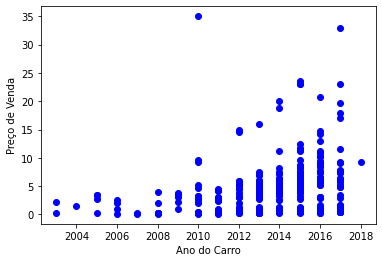

In [5]:
plt.scatter(df['ano'], df['preco_venda'], color = 'blue')
plt.xlabel('Ano do Carro')
plt.ylabel('Preço de Venda')
plt.show()

Plotando o gráfico de pontos dos quilômetros rodados em função do ano do carro

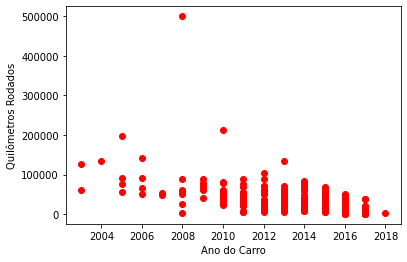

In [6]:
plt.scatter(df['ano'], df['kms_rodados'], color = 'red')
plt.xlabel('Ano do Carro')
plt.ylabel('Quilômetros Rodados')
plt.show()

Separando as variáveis em dependentes e independentes

In [7]:
#Variáveis independentes
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel', 'tipo_vendedor', 'tipo_transmissao', 'n_donos']]

#Variável dependente
y = df[['preco_venda']]

Separando dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Checando o tamanho dos registros usados para treino e para teste

In [9]:
print('Treino:')
print('x: ', x_train.shape)
print('y: ', y_train.shape)

print('\nTeste:')
print('x: ', x_test.shape)
print('y: ', y_test.shape)

Treino:
x:  (240, 7)
y:  (240, 1)

Teste:
x:  (61, 7)
y:  (61, 1)


Treinando o modelo

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Realizando a previsão dos preços

In [11]:
y_pred = model.predict(x_test)

Plotando o preço dos carros em função dos dados do teste

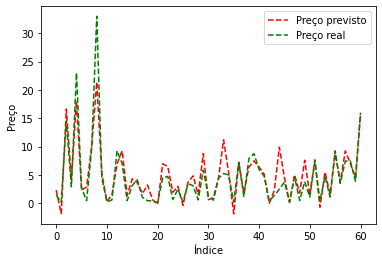

In [12]:
plt.plot(range(y_pred.shape[0]), y_pred, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g--')
plt.legend(['Preço previsto', 'Preço real'])
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.show()

Analisando o quanto o modelo pôde prever corretamente

In [13]:
from sklearn.metrics import r2_score
print('R2-Score: ', r2_score(y_test, y_pred))

R2-Score:  0.81826695689406


### Prática
Use as variáveis a seguir para fazer as previsões com base no que já foi visto

In [14]:
new_x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]
new_y = df[['preco_venda']]

Separe os dados em dados de treino e teste, e então defina um modelo de regressão e realize as previsões. Depois, use o r2_score para saber a nova porcentagem desse modelo. O resultado é melhor ou pior?

### Código
Primeiro vamos dividir os dados em dados de treino e de teste, tendo em vista que já importamos as bibliotecas necessárias anteriormente nesse notebook, não as importaremos novamente mas a colocaremos como comentários.

In [15]:
#from sklearn.model_selection import train_test_split
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, train_size = 0.2)

Agora, definiremos um  modelo de regressão

In [16]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(new_x_train, new_y_train)

LinearRegression()

Realizando as previsões e plotando-as em um gráfico em função dos dados de teste

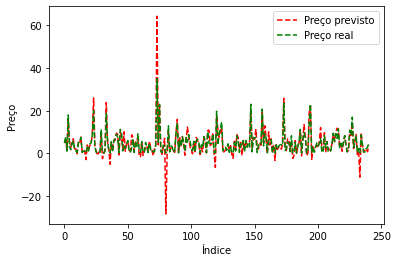

In [17]:
new_y_pred = model.predict(new_x_test)
plt.plot(range(new_y_pred.shape[0]), new_y_pred, 'r--')
plt.plot(range(new_y_test.shape[0]), new_y_test, 'g--')
plt.legend(['Preço previsto', 'Preço real'])
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.show()

Finalmente, utilizaremos o r2_score para sabermos a nova porcentagem do modelo

In [18]:
#from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(new_y_test, new_y_pred))

R2 Score:  0.5706943225037868


Assim, observamos um resultado pior que o obtido anteriormente.